# 프로젝트 : 다양한 OCR모델 비교

### Google OCR API, keras-ocr, Tesseract 이상 3가지의 OCR 기능

### Step1. Google OCR API, keras-ocr, Tesseract로 테스트 진행 

#### Step1-1. Google OCR API  

In [1]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [2]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
path = os.getenv('HOME')+'/aiffel/ocr_python/image/'
imgs = os.listdir(path)
image_list = []
for i in imgs:
    image_list.append(os.path.join(path,i))
image_list
for i in image_list:
    detect_text(i)

-rw-rw-r-- 1 aiffel-dj31 aiffel-dj31 2349 Mar 18 23:02 /home/aiffel-dj31/aiffel/ocr_python/my_google_api_key.json
Texts:

"SPREAD
LOVE
BITCHEZ
RUN
ZRH
"

"SPREAD"

"LOVE"

"BITCHEZ"

"RUN"

"ZRH"
bounds: (504,459),(835,458),(835,594),(505,595)
Texts:

"bad
Milk
inc.
"

"bad"

"Milk"

"inc."
bounds: (847,265),(883,245),(893,263),(857,283)
Texts:

"MEATIVIL
CR
SENSE C
"

"MEATIVIL"

"CR"

"SENSE"

"C"
bounds: (625,283),(647,254),(737,323),(715,351)
Texts:

"DIE
GANZE
WELT
HASST
DIE
POLIZEI
"

"DIE"

"GANZE"

"WELT"

"HASST"

"DIE"

"POLIZEI"
bounds: (282,518),(374,518),(374,548),(282,548)
Texts:

"FCK
NZS
FCK
SUV
"

"FCK"

"NZS"

"FCK"

"SUV"
bounds: (412,500),(541,505),(539,546),(410,541)
Texts:

"YOU'RE NOT LOST
YOU'RE HERE
"

"YOU'RE"

"NOT"

"LOST"

"YOU'RE"

"HERE"
bounds: (437,165),(596,166),(596,198),(437,197)
Texts:

"HEY KIDS
ART IS
USELESS
"

"HEY"

"KIDS"

"ART"

"IS"

"USELESS"
bounds: (643,539),(716,539),(716,551),(643,551)
Texts:

"NOT
"

"NOT"
bounds: (64,31),(2,31),(2,0),

### Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행 

#### Step2-1. Keras-OCR

In [3]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel-dj31/.keras-ocr/craft_mlt_25k.h5
Looking for /home/aiffel-dj31/.keras-ocr/crnn_kurapan.h5


In [6]:
image_urls = [
  'https://images.unsplash.com/photo-1587671369229-c41dd67be237?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=1234&q=80',
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4',
]
images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

/home/aiffel-dj31/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


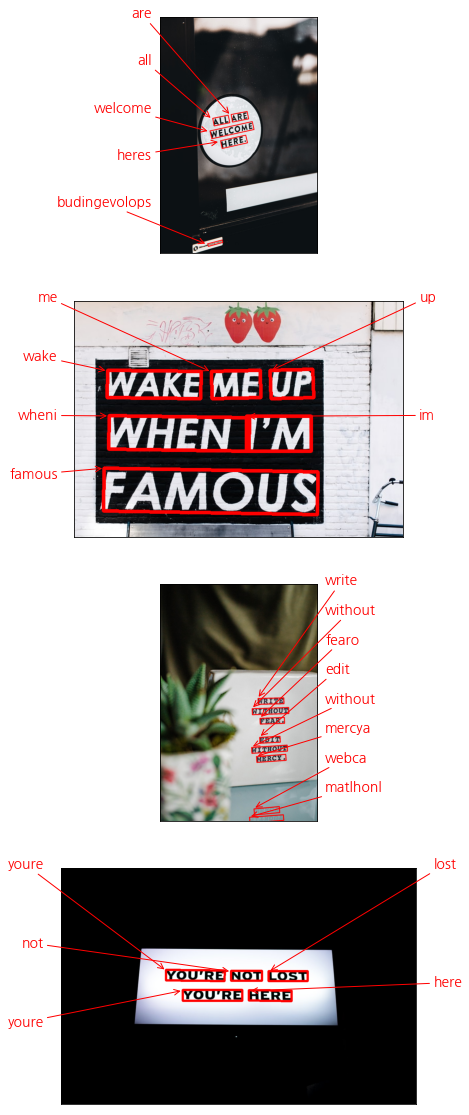

In [7]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

#### Step1-3. Tesseract OCR

In [10]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
img_file_path = work_dir + '/world2.jpeg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/aiffel-dj31/aiffel/ocr_python/image/0000.png


In [11]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

S

Done


# 프로젝트를 마치며...

In [12]:
### Google OCR API 경우 15장 정도 되는 이미지 사진의 텍스트를 거의 정확하게 출력하였다 오히려 내가 보지 못한 부분의 문자까지 출력 하였다. 
### keras-ocr의경우 url  넣는 부분에서 조금 난항이 있었으며 대체로 문자인식 후 출력이 잘되었다.
### Tesseract는 이미지사진이 배경의 대부분을 차지 하며 문자가 크기? 양? 적으면 출력을 하지 못할때도 있었다. 
### 결론 Google OCR API가 제일 정확하고 문자 출력이 좋았다. (구글신..)
### OCR란 무엇이 알게 되서 좋았다